In [1]:
import numpy as np
import pandas as pd
import itertools as it
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib

In [2]:
# PALETTE 
col_1 = '#648FFF'
col_2 = '#785EF0'
col_3 = '#DC267F'
col_4 = '#FE6100'
col_5 = '#FFB000'

In [3]:
# Function to annotate a matplotlib based heatmap
def annotate_heatmap(im, font_size, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), fontsize=font_size, **kw)
            texts.append(text)

    return texts

In [4]:
# Function to genereate the heatmap
def heat_map (time, input, comb_names):

    #Select specific time
    df = input[time]
    #cmap = LinearSegmentedColormap.from_list('palette', [col_2,col_3], N=100)

    #Select grid size according to the number of pairs
    length = len(df)
    if length == 6:
        x, y = 3, 2
        y_size = 9.8
    if length == 3:
        x, y = 3, 1
        y_size = 4.75
   
    fig, ax = plt.subplots(nrows = y, ncols = x, figsize=(18,y_size), squeeze=False)
    comb_counter = 0 #pairs counter
    for i in range(y):
        for j in range(x):

            #Select specific pair
            dframe = df[comb_names[comb_counter]]
            comb_counter += 1
            
            im = ax[i,j].imshow(dframe.values, cmap='PuBu')

            #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
            x_ticks = [dframe.columns[i][1] for i in range(len(dframe.columns))]
            ax[i,j].set_xticks(ticks=range(len(dframe.columns)), labels=x_ticks)
            
            x_title = dframe.columns[0][0].title()
            ax[i,j].set_xlabel(x_title, fontsize=12)
            
            y_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
            ax[i,j].set_yticks(ticks=range(len(dframe.index)), labels=y_ticks)
            
            y_title = dframe.index[0][0].title()
            ax[i,j].set_ylabel(y_title, fontsize=12)
            
            title = "{0} vs {1}".format(y_title, x_title)
            ax[i,j].set_title(title, fontsize=14)

            #Set colorbar and its ticks
            cbar = ax[i,j].figure.colorbar(im, ax=ax[i,j])
            vmin, vmax = im.norm.vmin, im.norm.vmax
            num_ticks = 7
            cticks = np.linspace(vmin, vmax, num_ticks)
            cbar.set_ticks(cticks[1:-1])
            cticks_s = ["{0:.1f} s".format(val) for val in cticks[1:-1]]
            cbar.set_ticklabels(cticks_s)
            
            texts = annotate_heatmap(im, valfmt="{x:.2f}", font_size=13)
            
    #cbar = fig.colorbar(im, ax=ax.ravel().tolist(), location='right', pad=0.05, shrink=0.8)
    plt.suptitle("Parameters' Heatmap for {0}".format(time.title().replace('_'," ")), fontsize=25)
    plt.show()
            

In [5]:
# Function to genereate the x-y plots
def x_y_plot (time, input, comb_names, parameters, par_names, combinations):

    #Select specific time
    df = input[time]
    #cmap = LinearSegmentedColormap.from_list('palette', [col_2,col_3], N=100)

    #Select grid size and details according to the number of pairs
    length = len(df)
    if length == 6:
        x, y = 3, 2
        y_size = 9.8
        Top_adj = 0.9
    if length == 3:
        x, y = 3, 1
        y_size = 5
        Top_adj = 0.85
   
    fig, ax = plt.subplots(nrows = y, ncols = x, figsize=(20,y_size), squeeze=False)
    comb_counter = 0 #pairs counter
    for i in range(y):
        for j in range(x):

            #Select specific pair
            dframe = df[comb_names[comb_counter]]
            

            for k, fixed in enumerate(parameters[par_names[combinations[comb_counter][1]]]):
                xy_title = dframe.iloc[:,k]
                x_array = range(len(xy_title.index.get_level_values(1).to_numpy()))
                y_array = xy_title.values
                ax[i,j].plot(x_array, y_array, label = fixed)
            
            comb_counter += 1
            #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
            x_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
            ax[i,j].set_xticks(ticks=range(len(dframe.index)), labels=x_ticks)
            
            x_title = dframe.index[0][0].title()
            ax[i,j].set_xlabel(x_title, fontsize=12)
            
            #y_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
            #ax[i,j].set_yticks(ticks=range(len(dframe.index)), labels=y_ticks)
            
            y_title = 'Time (s)'
            ax[i,j].set_ylabel(y_title, fontsize=12)

            legend_title = dframe.columns[0][0].title()
            ax[i,j].legend(title=legend_title,alignment='center',title_fontsize = 14,loc = 'best')
            
            title = "{0} Time Trend for fixed {1}".format(x_title, legend_title)
            ax[i,j].set_title(title, fontsize=14)
            ax[i,j].grid()
                        
    plt.suptitle("Time Trends for {0}".format(time.title().replace('_'," ")), fontsize=25)
    plt.subplots_adjust(top=Top_adj)
    plt.show()
            

In [6]:
#output files
output_file_1 = 'time_output_1.pkl'
# output_file_2 = 'time_output_2.pkl'

#reading pickles
with open(output_file_1, "rb") as fill:
    input_1 = pickle.load(fill)
    par_names_1 = input_1[0]
    parameters_1 = input_1[1]
    combinations_1 = input_1[2]
    comb_names_1 = input_1[3]
    times_1 = input_1[4]
    output_times_1 = input_1[5]

#reading pickles
# with open(output_file_2, "rb") as fill:
#     input_2 = pickle.load(fill)
#     par_names_2 = input_2[0]
#     parameters_2 = input_2[1]
#     combinations_2 = input_2[2]
#     comb_names_2 = input_2[3]
#     times_2 = input_2[4]
#     output_times_2 = input_2[5]

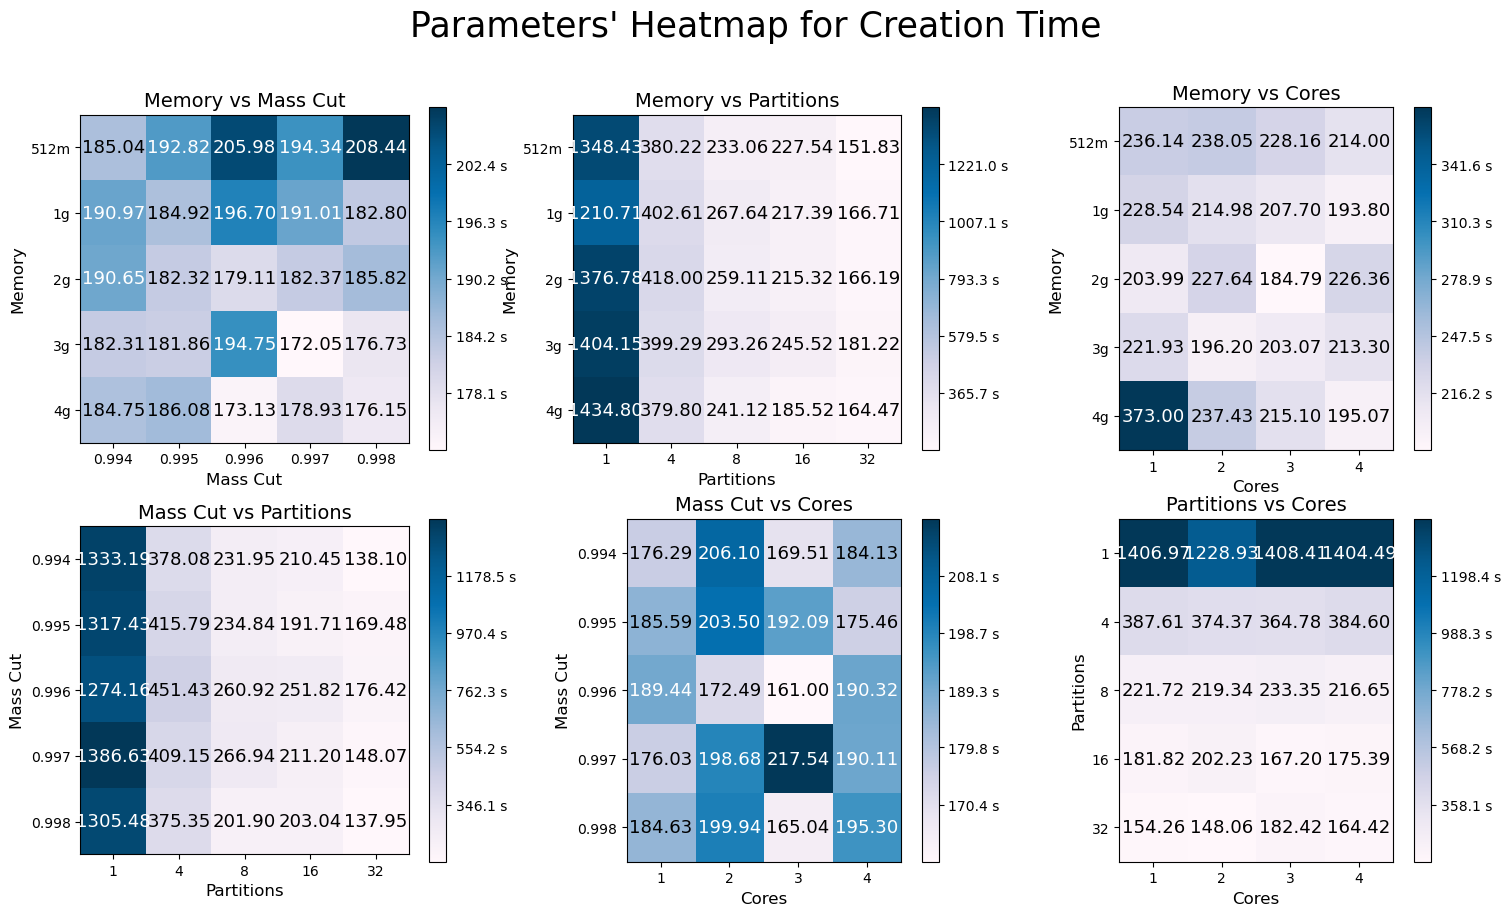

In [7]:
heat_map (times_1[0], output_times_1, comb_names_1)

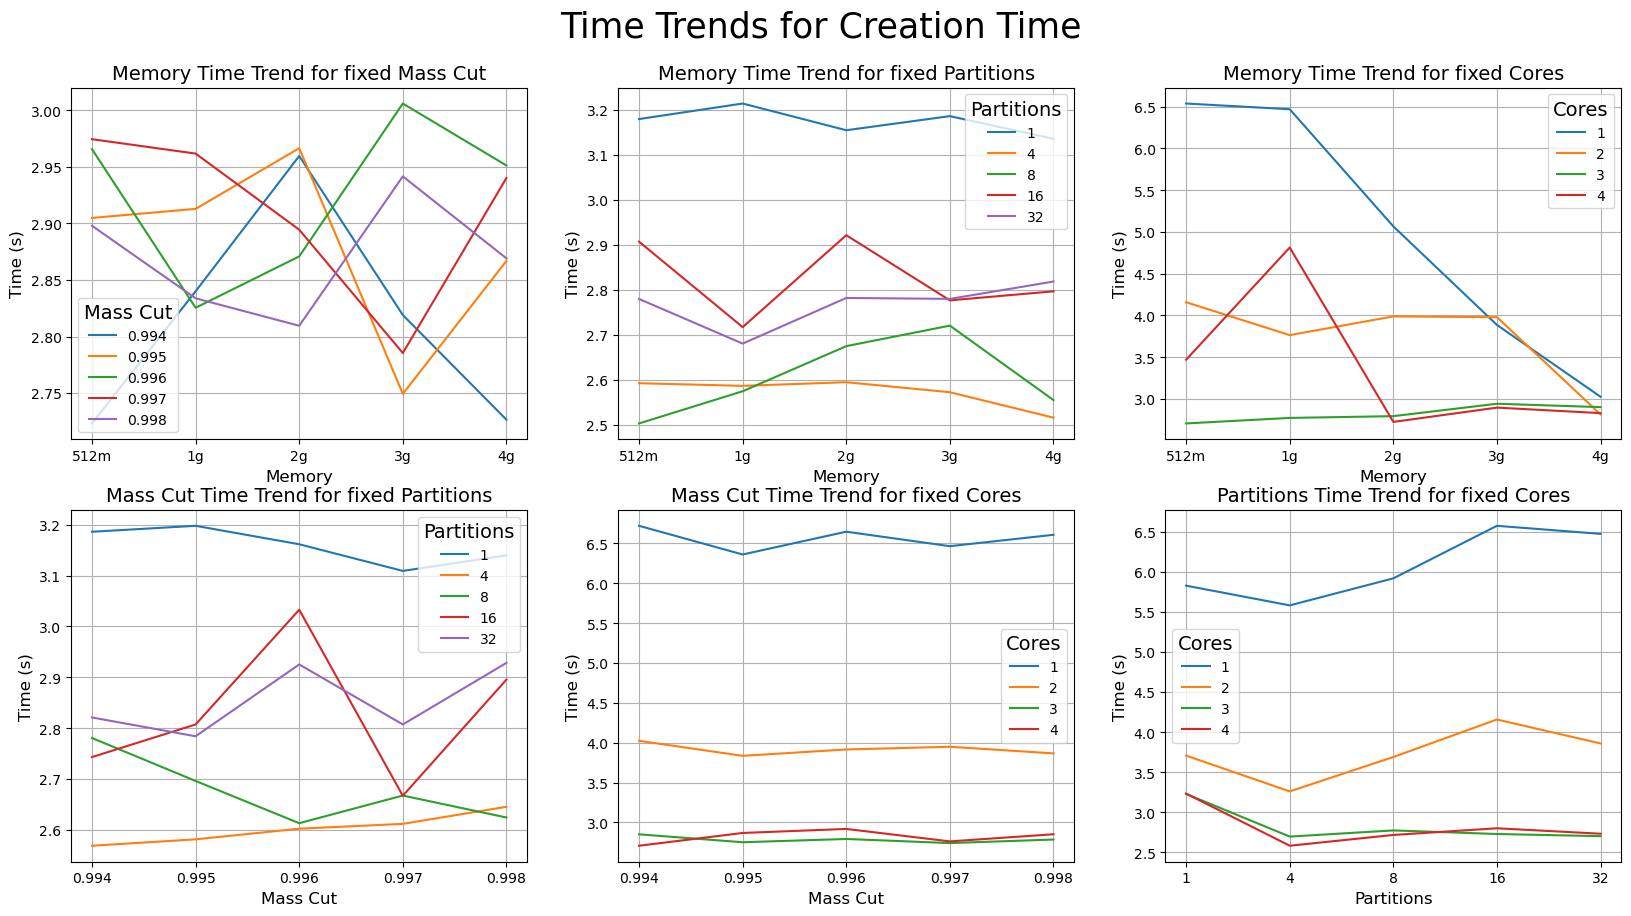

In [9]:
x_y_plot (times_1[0], output_times_1, comb_names_1, parameters_1, par_names_1, combinations_1)

In [10]:
heat_map (times_2[0], output_times_2, comb_names_2)

NameError: name 'times_2' is not defined

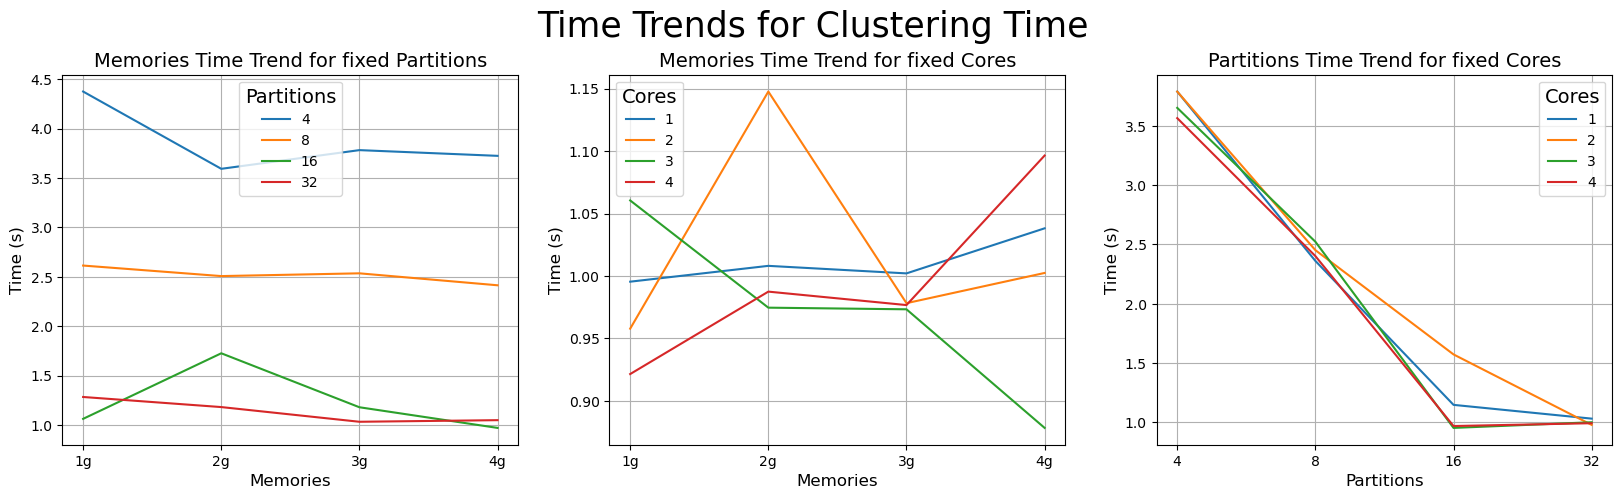

In [197]:
x_y_plot (times_2[0], output_times_2, comb_names_2, parameters_2, par_names_2, combinations_2)

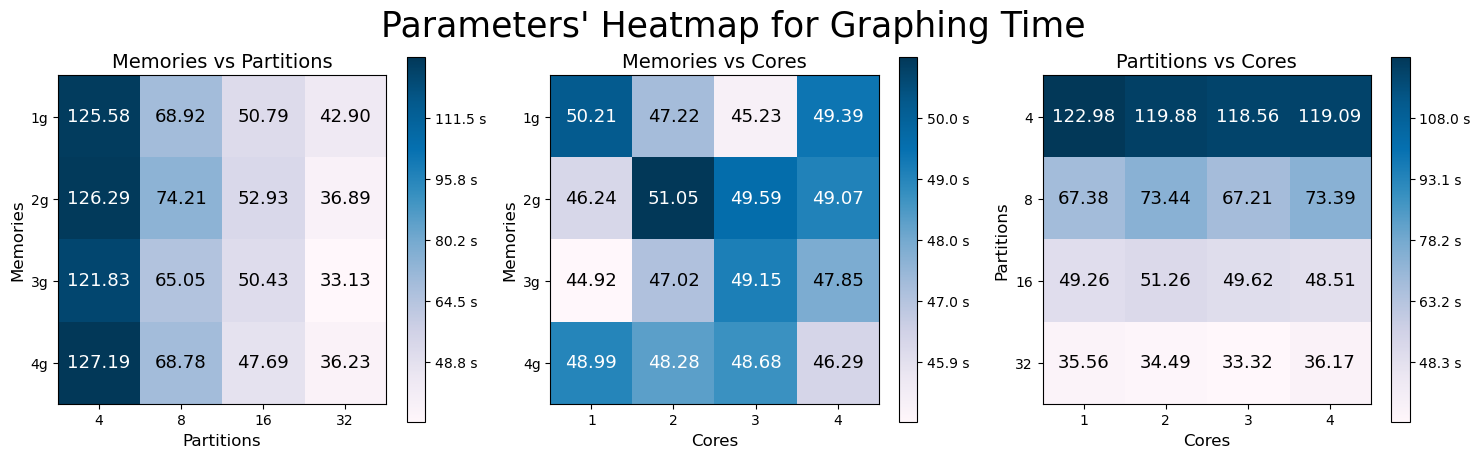

In [66]:
heat_map (times_2[1], output_times_2, comb_names_2)

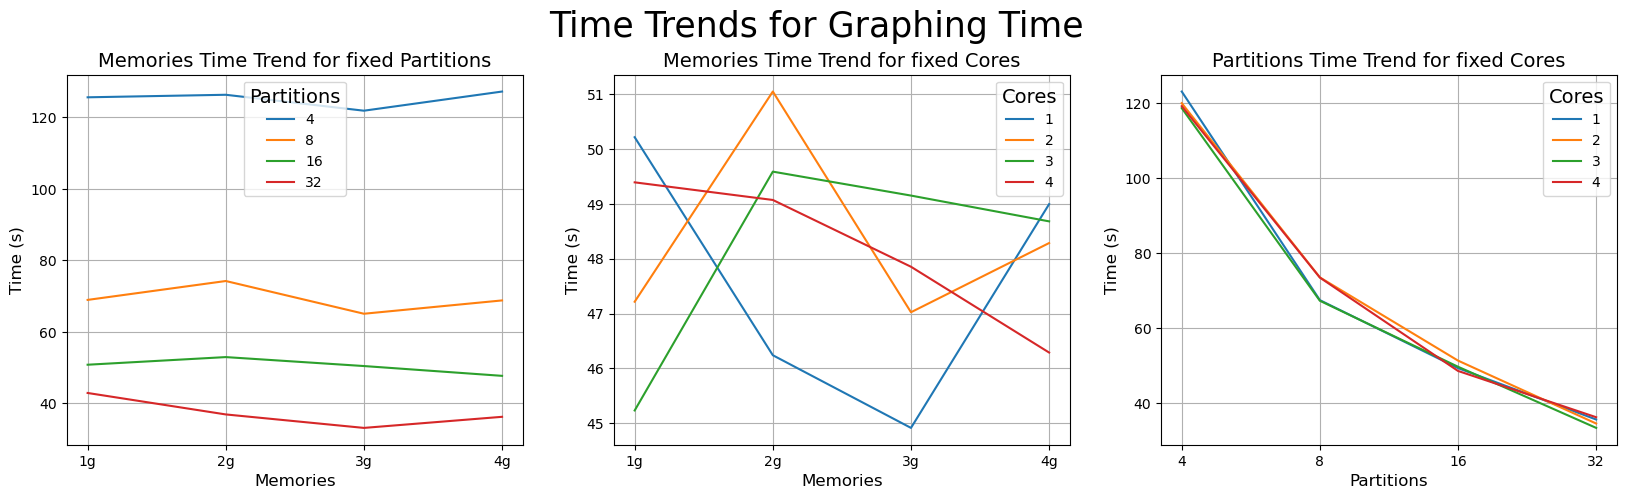

In [198]:
x_y_plot (times_2[1], output_times_2, comb_names_2, parameters_2, par_names_2, combinations_2)